<a href="https://colab.research.google.com/github/JulieMew/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/MMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##What variable has the most effect on how a fight ends?

Weight class clearly affects strategies employed by fighters, as does the school a fighter goes to, but how does that affect the fight itself? In this analysis we'll see what how a fight is likely to end for each weight division, and for fighters trained by different organizations.

---




In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import scipy as sp
import seaborn as sns 
from pandas import Series, DataFrame

In [2]:
#load in datasets
from google.colab import files
uploaded = files.upload()

Saving ALL UFC FIGHTS 2_23_2016 SHERDOG.COM - Sheet1.csv to ALL UFC FIGHTS 2_23_2016 SHERDOG.COM - Sheet1.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving ALL UFC FIGHTERS 2_23_2016 SHERDOG.COM - Sheet1.csv to ALL UFC FIGHTERS 2_23_2016 SHERDOG.COM - Sheet1.csv


In [4]:
#This dataframe contains every UF event up to 2016.
fights = pd.read_csv('ALL UFC FIGHTS 2_23_2016 SHERDOG.COM - Sheet1.csv')
print(fights.shape)
fights[15:30]

(3569, 20)


,pageurl,eid,mid,event_name,event_org,event_date,event_place,f1pageurl,f2pageurl,f1name,f2name,f1result,f2result,f1fid,f2fid,method,method_d,ref,round,time
15,/events/UFC-2-No-Way-Out-8,8,8,UFC 2 - No Way Out,Ultimate Fighting Championship,3/11/1994,"Fillmore Auditorium, Denver, Colorado, United ...",/fighter/Royce-Gracie-19,/fighter/Minoki-Ichihara-35,Royce Gracie,Minoki Ichihara,win,loss,19,35,Submission,Lapel Choke,John McCarthy,1,5:08
16,/events/UFC-2-No-Way-Out-8,8,7,UFC 2 - No Way Out,Ultimate Fighting Championship,3/11/1994,"Fillmore Auditorium, Denver, Colorado, United ...",/fighter/Jason-DeLucia-22,/fighter/Scott-Baker-34,Jason DeLucia,Scott Baker,win,loss,22,34,Submission,Punches,John McCarthy,1,6:41
17,/events/UFC-2-No-Way-Out-8,8,6,UFC 2 - No Way Out,Ultimate Fighting Championship,3/11/1994,"Fillmore Auditorium, Denver, Colorado, United ...",/fighter/Remco-Pardoel-33,/fighter/Alberto-Cerra-Leon-37,Remco Pardoel,Alberto Cerra Leon,win,loss,33,37,Submission,Armlock,John McCarthy,1,9:51
18,/events/UFC-2-No-Way-Out-8,8,5,UFC 2 - No Way Out,Ultimate Fighting Championship,3/11/1994,"Fillmore Auditorium, Denver, Colorado, United ...",/fighter/Orlando-Wiet-31,/fighter/Robert-Lucarelli-32,Orlando Wiet,Robert Lucarelli,win,loss,31,32,TKO,Knees,John McCarthy,1,2:50
19,/events/UFC-2-No-Way-Out-8,8,4,UFC 2 - No Way Out,Ultimate Fighting Championship,3/11/1994,"Fillmore Auditorium, Denver, Colorado, United ...",/fighter/Frank-Hamaker-29,/fighter/Thaddeus-Luster-30,Frank Hamaker,Thaddeus Luster,win,loss,29,30,TKO,Corner Stoppage,John McCarthy,1,4:52
20,/events/UFC-2-No-Way-Out-8,8,3,UFC 2 - No Way Out,Ultimate Fighting Championship,3/11/1994,"Fillmore Auditorium, Denver, Colorado, United ...",/fighter/Johnny-Rhodes-27,/fighter/David-Levicki-28,Johnny Rhodes,David Levicki,win,loss,27,28,Submission,Punches,John McCarthy,1,12:13
21,/events/UFC-2-No-Way-Out-8,8,2,UFC 2 - No Way Out,Ultimate Fighting Championship,3/11/1994,"Fillmore Auditorium, Denver, Colorado, United ...",/fighter/Patrick-Smith-21,/fighter/Ray-Wizard-26,Patrick Smith,Ray Wizard,win,loss,21,26,Submission,Guillotine Choke,John McCarthy,1,0:58
22,/events/UFC-2-No-Way-Out-8,8,1,UFC 2 - No Way Out,Ultimate Fighting Championship,3/11/1994,"Fillmore Auditorium, Denver, Colorado, United ...",/fighter/Scott-Morris-24,/fighter/Sean-Daugherty-25,Scott Morris,Sean Daugherty,win,loss,24,25,Submission,Guillotine Choke,John McCarthy,1,0:20
23,/events/UFC-3-The-American-Dream-9,9,6,UFC 3 - The American Dream,Ultimate Fighting Championship,9/9/1994,"Grady Cole Center, Charlotte, North Carolina, ...",/fighter/Steve-Jennum-44,/fighter/Harold-Howard-41,Steve Jennum,Harold Howard,win,loss,44,41,Submission,Punches,John McCarthy,1,1:27
24,/events/UFC-3-The-American-Dream-9,9,5,UFC 3 - The American Dream,Ultimate Fighting Championship,9/9/1994,"Grady Cole Center, Charlotte, North Carolina, ...",/fighter/Ken-Shamrock-4,/fighter/Felix-Mitchell-45,Ken Shamrock,Felix Mitchell,win,loss,4,45,Submission,Rear-Naked Choke,John McCarthy,1,4:34


In [5]:
#This contains every fighter in UFC up to 2016.
fighters = pd.read_csv('ALL UFC FIGHTERS 2_23_2016 SHERDOG.COM - Sheet1.csv')
print(fighters.shape)
fighters.head()

(1561, 11)


,url,fid,name,nick,birth_date,height,weight,association,class,locality,country
0,/fighter/Conor-McGregor-29688,29688,Conor McGregor,Notorious,7/14/1988,68.0,145.0,SBG Ireland,Featherweight,Dublin,Ireland
1,/fighter/Jon-Jones-27944,27944,Jon Jones,Bones,7/19/1987,76.0,205.0,Jackson-Wink MMA,Light Heavyweight,"Rochester, New York",United States
2,/fighter/Holly-Holm-75125,75125,Holly Holm,The Preacher's Daughter,10/17/1981,68.0,135.0,Jackson-Wink MMA,Bantamweight,"Albuquerque, New Mexico",United States
3,/fighter/Dominick-Cruz-12107,12107,Dominick Cruz,The Dominator,9/3/1985,68.0,134.0,Alliance MMA,Bantamweight,"San Diego, California",United States
4,/fighter/Demetrious-Johnson-45452,45452,Demetrious Johnson,Mighty Mouse,8/13/1986,63.0,125.0,AMC Pankration,Flyweight,"Kirkland, Washington",United States


In [8]:
#Frequency these unique moves are used, number of unique ways a fight has ended, and number to toal ended fights.
fights['method_d'].describe()

count          3549
unique          175
top       Unanimous
freq           1142
Name: method_d, dtype: object

40.2% of all UFC fights have ended in a uninimous decision since the first UFC in 1993. 

##Most common fight conclusions.

in the chart below, we see it's most common for UFC fights to end with a unanimous points decision (40.2% follow this trend), followed by knockouts delivered by punches. 

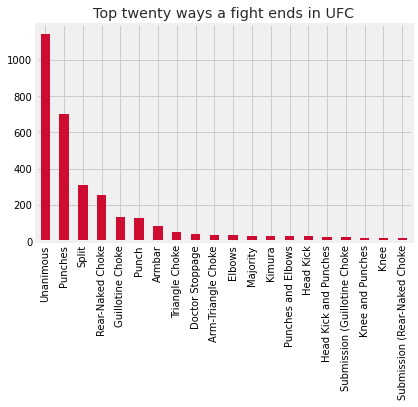

In [9]:
#Graph frequency of fight ending techniques in UFC.

fights['method_d'].value_counts().head(20).plot.bar(color = '#CE0B31')
plt.title('Top twenty ways a fight ends in UFC', color = '#292929')
plt.show()

Okay, so Unanimous decisions are the most common way for a fight to end. This makes sense given UFC fighters are generally of similar weights and skill levels, and skill sets. What factors make this the case though? A good place to look might be looking into which associations are most common, and which of those organizations are most associated with winning UFC fights.

In [11]:
#First, let's get a list of all fighters in the UFC.

fighters['name'].nunique()

1525

In [12]:
#Now, let's do the same for associations.
fighters['association'].nunique()

651

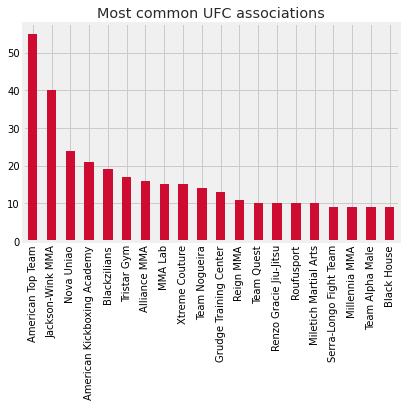

In [13]:
#Let's look at the top twenty organizations to get an idea of who's on top.
fighters['association'].value_counts().head(20).plot.bar(color = '#CE0B31')
plt.title('Most common UFC associations', color = '#292929')
plt.show()

There's alot of organizations in UFC, but are the largest groups in UFC largest because they produce winners consistently, or did they just produce the most fighters who made it to UFC?

In [14]:
#First let's see which fighters are associated with the largest association: American Top Team.
fighters[['name', 'association']].describe()

,name,association
count,1560,1366
unique,1525,651
top,Renan Barao,American Top Team
freq,3,55


In [15]:
#number of extra values in name, how many duplicates are there.
1560 - 1525

35

It looks like alot of fighters aren't associated with an association. Also, some fighters have multiple entries, as many as three apparently.

In [16]:
#Number of "Rogue" fighters, those without an association.
1525 - 1366

159

Let's look at the top 10 fighters, and see if their most common techniques are different from the most common.

In [33]:
#George St. Pierre #1
fights[['f1name', 'f1result']].describe()

,f1name,f1result
count,3569,3569
unique,986,3
top,Georges St. Pierre,win
freq,19,3510


In [0]:
# Remove George St. Pierre from copied list to see who has the second highest wins.
top_100 = []
top_100.append('George St. Pierre')

In [0]:
f2 = fights[fights.f1name != 'Georges St. Pierre']

In [36]:
f2[['f1name', 'f1result']].describe()

,f1name,f1result
count,3550,3550
unique,985,3
top,Matt Hughes,win
freq,18,3491


In [0]:
#Matt Hughes is number 2

In [0]:
f3 = f2[f2.f1name != 'Matt Hughes']

In [39]:
f3[['f1name', 'f1result']].describe()

,f1name,f1result
count,3532,3532
unique,984,3
top,Michael Bisping,win
freq,17,3473


In [0]:
#Gleison Tibau is number 3

In [0]:
f4 = f3[f3.f1name != 'Gleison Tibau']

In [42]:
f4[['f1name', 'f1result']].describe()

,f1name,f1result
count,3515,3515
unique,983,3
top,Anderson Silva,win
freq,17,3456


In [43]:
#Anderson Silva is number 4
f5 = f4[f4.f1name != 'Anderson Silva']
f5[['f1name', 'f1result']].describe()

,f1name,f1result
count,3498,3498
unique,982,3
top,Michael Bisping,win
freq,17,3440


In [44]:
#Michael Bisping is number 5
f6 = f5[f5.f1name != 'Michael Bisping']
f6[['f1name', 'f1result']].describe()

,f1name,f1result
count,3481,3481
unique,981,3
top,Chuck Liddell,win
freq,16,3423


In [45]:
#	Frank Mir is number 6
f7 = f6[f6.f1name != 'Frank Mir']
f7[['f1name', 'f1result']].describe()

,f1name,f1result
count,3465,3465
unique,980,3
top,Demian Maia,win
freq,16,3407


In [46]:
#	Chuck Liddell is number 7
f8 = f7[f7.f1name != 'Chuck Liddell']
f8[['f1name', 'f1result']].describe()

,f1name,f1result
count,3449,3449
unique,979,3
top,Donald Cerrone,win
freq,16,3391


In [47]:
#	Demian Maia is number 8
f9 = f8[f8.f1name != 'Demian Maia']
f9[['f1name', 'f1result']].describe()

,f1name,f1result
count,3433,3433
unique,978,3
top,Donald Cerrone,win
freq,16,3375


In [48]:
#Donald Cerrone is number 9
f10 = f9[f9.f1name != 'Donald Cerrone']
f10[['f1name', 'f1result']].describe()

,f1name,f1result
count,3417,3417
unique,977,3
top,Frankie Edgar,win
freq,15,3359


In [49]:
#Frankie Edgar is number 10
f11 = f10[f10.f1name != 'Frankie Edgar']
f11[['f1name', 'f1result']].describe()

,f1name,f1result
count,3402,3402
unique,976,3
top,Jon Jones,win
freq,15,3345


Our top 10:

1. Georges St. Pierre

2. Matt Hughes

3. Gleison Tibau

4. Anderson Silva

5. Michael Bisping

6. Frank Mir

7. Chuck Liddel

8. Demian Maia

9. Donald Cerrone	

10. Frankie Edgar	

In [0]:
#resetting the CSV
fights = pd.read_csv('ALL UFC FIGHTS 2_23_2016 SHERDOG.COM - Sheet1.csv')

In [51]:
#George St. Pierre's favorite ending technique was uninimous.

fights[['f1name', 'method_d']].describe()

,f1name,method_d
count,3569,3549
unique,986,175
top,Georges St. Pierre,Unanimous
freq,19,1142


In [52]:
#Matt Hughes is also unanimous.

f2[['f1name', 'method_d']].describe()

,f1name,method_d
count,3550,3530
unique,985,175
top,Matt Hughes,Unanimous
freq,18,1132


In [53]:
#Gleison Tibau

f3[['f1name', 'method_d']].describe()

,f1name,method_d
count,3532,3512
unique,984,175
top,Michael Bisping,Unanimous
freq,17,1127


In [54]:
f4[['f1name', 'method_d']].describe()

,f1name,method_d
count,3515,3495
unique,983,175
top,Anderson Silva,Unanimous
freq,17,1121


In [55]:
f6[['f1name', 'method_d']].describe()

,f1name,method_d
count,3481,3461
unique,981,173
top,Chuck Liddell,Unanimous
freq,16,1114


In [56]:
f7[['f1name', 'method_d']].describe()

,f1name,method_d
count,3465,3445
unique,980,169
top,Demian Maia,Unanimous
freq,16,1112


In [57]:
f8[['f1name', 'method_d']].describe()

,f1name,method_d
count,3449,3429
unique,979,169
top,Donald Cerrone,Unanimous
freq,16,1106


In [58]:
f9[['f1name', 'method_d']].describe()

,f1name,method_d
count,3433,3413
unique,978,169
top,Donald Cerrone,Unanimous
freq,16,1098


In [59]:
f10[['f1name', 'method_d']].describe()

,f1name,method_d
count,3417,3397
unique,977,169
top,Frankie Edgar,Unanimous
freq,15,1092


Let's see how Georges St. Pierre ends his fights.

In [72]:
George = fights.loc[fights['f1name'] == 'Georges St. Pierre']
George['method_d'].value_counts()

Unanimous                10
Split                     2
Corner Stoppage           1
Armbar                    1
Knees to the Body         1
Head Kick and Punches     1
Rear-Naked Choke          1
Punches                   1
Punches and Elbows        1
Name: method_d, dtype: int64

Let's compare how ends fights to how most fights are ended.

In [106]:
#Check number of ending techniques again.
fights['method_d'].value_counts().head(9)

Unanimous           1142
Punches              699
Split                308
Rear-Naked Choke     252
Guillotine Choke     134
Punch                126
Armbar                85
Triangle Choke        49
Doctor Stoppage       41
Name: method_d, dtype: int64

In [97]:
#Check number of fights again.
fights.shape

(3569, 20)

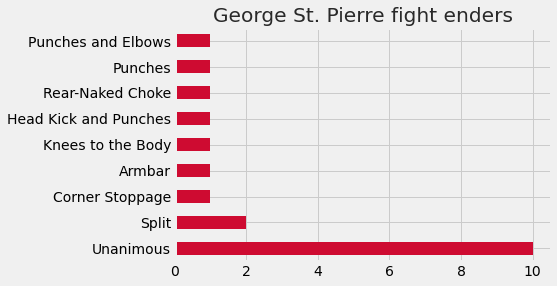

In [120]:
#Frequency of fight ending techniques used by George St. Pierre.

George['method_d'].value_counts().plot.barh(color = '#CE0B31')
plt.title('George St. Pierre fight enders', color = '#292929')
plt.show()

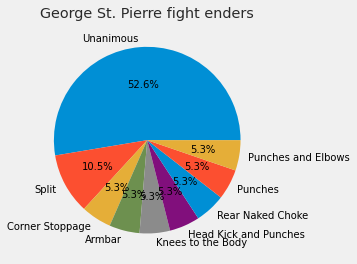

In [147]:
#Same values expressed as a percentage.
plt.pie(George['method_d'].value_counts(), labels = ['Unanimous', 'Split', 'Corner Stoppage', 'Armbar', 'Knees to the Body',
                                                     'Head Kick and Punches', 'Rear Naked Choke', 'Punches', 'Punches and Elbows'], 
        autopct='%.1f%%')
plt.title('George St. Pierre fight enders', color = '#292929')
plt.rcParams['font.size'] = 10
plt.show()

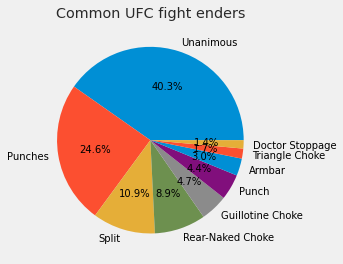

In [151]:
#Percentage of all fights in ufc divided by fight endign technique only.
plt.pie(fights['method_d'].value_counts().head(9), labels = ['Unanimous', 'Punches', 'Split', 'Rear-Naked Choke', 'Guillotine Choke',
                                                            'Punch', 'Armbar', 'Triangle Choke', 'Doctor Stoppage' ] ,autopct='%.1f%%')
plt.title('Common UFC fight enders', color = '#292929')
plt.rcParams['font.size'] = 10
plt.show()

How much variance is there in the number of unanimous fights Georges St. Pierre has had compared to most fighters?

In [154]:
# The difference in Unanimous wins between George St. Pierre and the average population.
52.6 - 40.3

12.300000000000004